In [1]:
# Import 
import pandas as pd 
import numpy as np 
import mne
import matplotlib.pyplot as plt

In [2]:
# Import dataset 
df = pd.read_csv("../dataset/DREAM/Datasets.csv", index_col=0)
rec_df = pd.read_csv("../dataset/DREAM/Data records.csv", index_col=0)
people_df = pd.read_csv("../dataset/DREAM/People.csv")

#### Note for myself

Basically, the Data records.csv contains information for each wakenings. People.csv contains contact information of the contributors. Datasets.csv is information of each dataset.


#### 2. Read .edf file

In [3]:
file = "../dataset/DREAM/Zhang & Wamsley 2019/Data/PSG/subject026_Morning.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()

# Get metadata
info = data.info
channels = data.ch_names

raw_df = pd.DataFrame(raw_data)
raw_df.index = channels

Extracting EDF parameters from c:\Users\PC\Documents\Personal Projects\AI_Honor_track\project\TUe-Honors-MedAI\dataset\DREAM\Zhang & Wamsley 2019\Data\PSG\subject026_Morning.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [4]:
# Record info
rec_df \
    .loc[rec_df.Filename == "subject026_Morning.edf"] \
    .iloc[0]

Set ID                                         1
Amendment                                      0
Filename                  subject026_Morning.edf
Case ID                               26_Morning
Subject ID                                    26
Experience                                   2.0
Treatment group                              NaN
Duration                                    73.0
EEG sample rate                              400
Number of EEG channels                        58
Last sleep stage                             2.0
Has EOG                                        1
Has EMG                                        1
Has ECG                                        0
Proportion artifacts                         NaN
Time of awakening                       08:52:24
Subject age                                 18.0
Subject sex                                    0
Subject healthy                                1
Has more data                                  1
Remarks             

#### 3. General plot

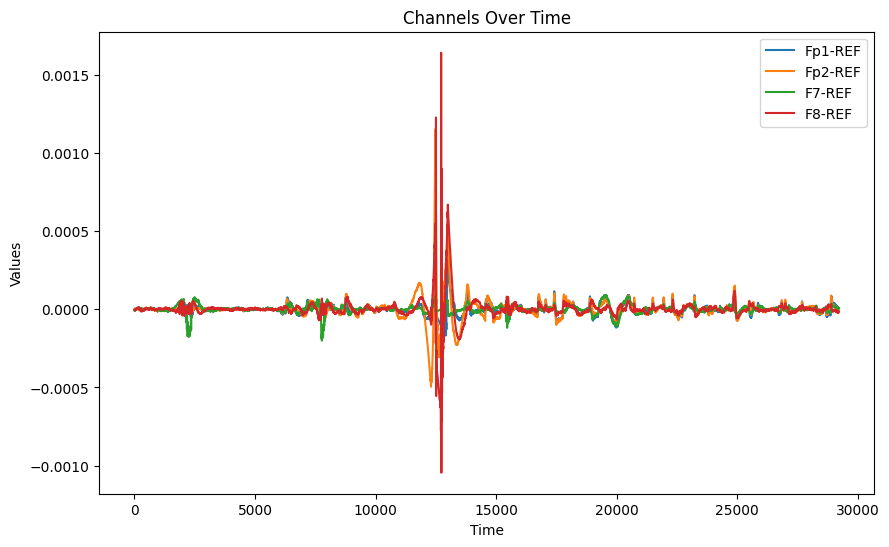

In [23]:
# Raw data
t_channels = [name + "-REF" for name in ["Fp1", "Fp2", "F7", "F8"]]
plt.figure(figsize=(10, 6))

for name, channel in raw_df.loc[t_channels].iterrows():
    plt.plot(channel, label=name)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Channels Over Time')

plt.legend()
plt.show()

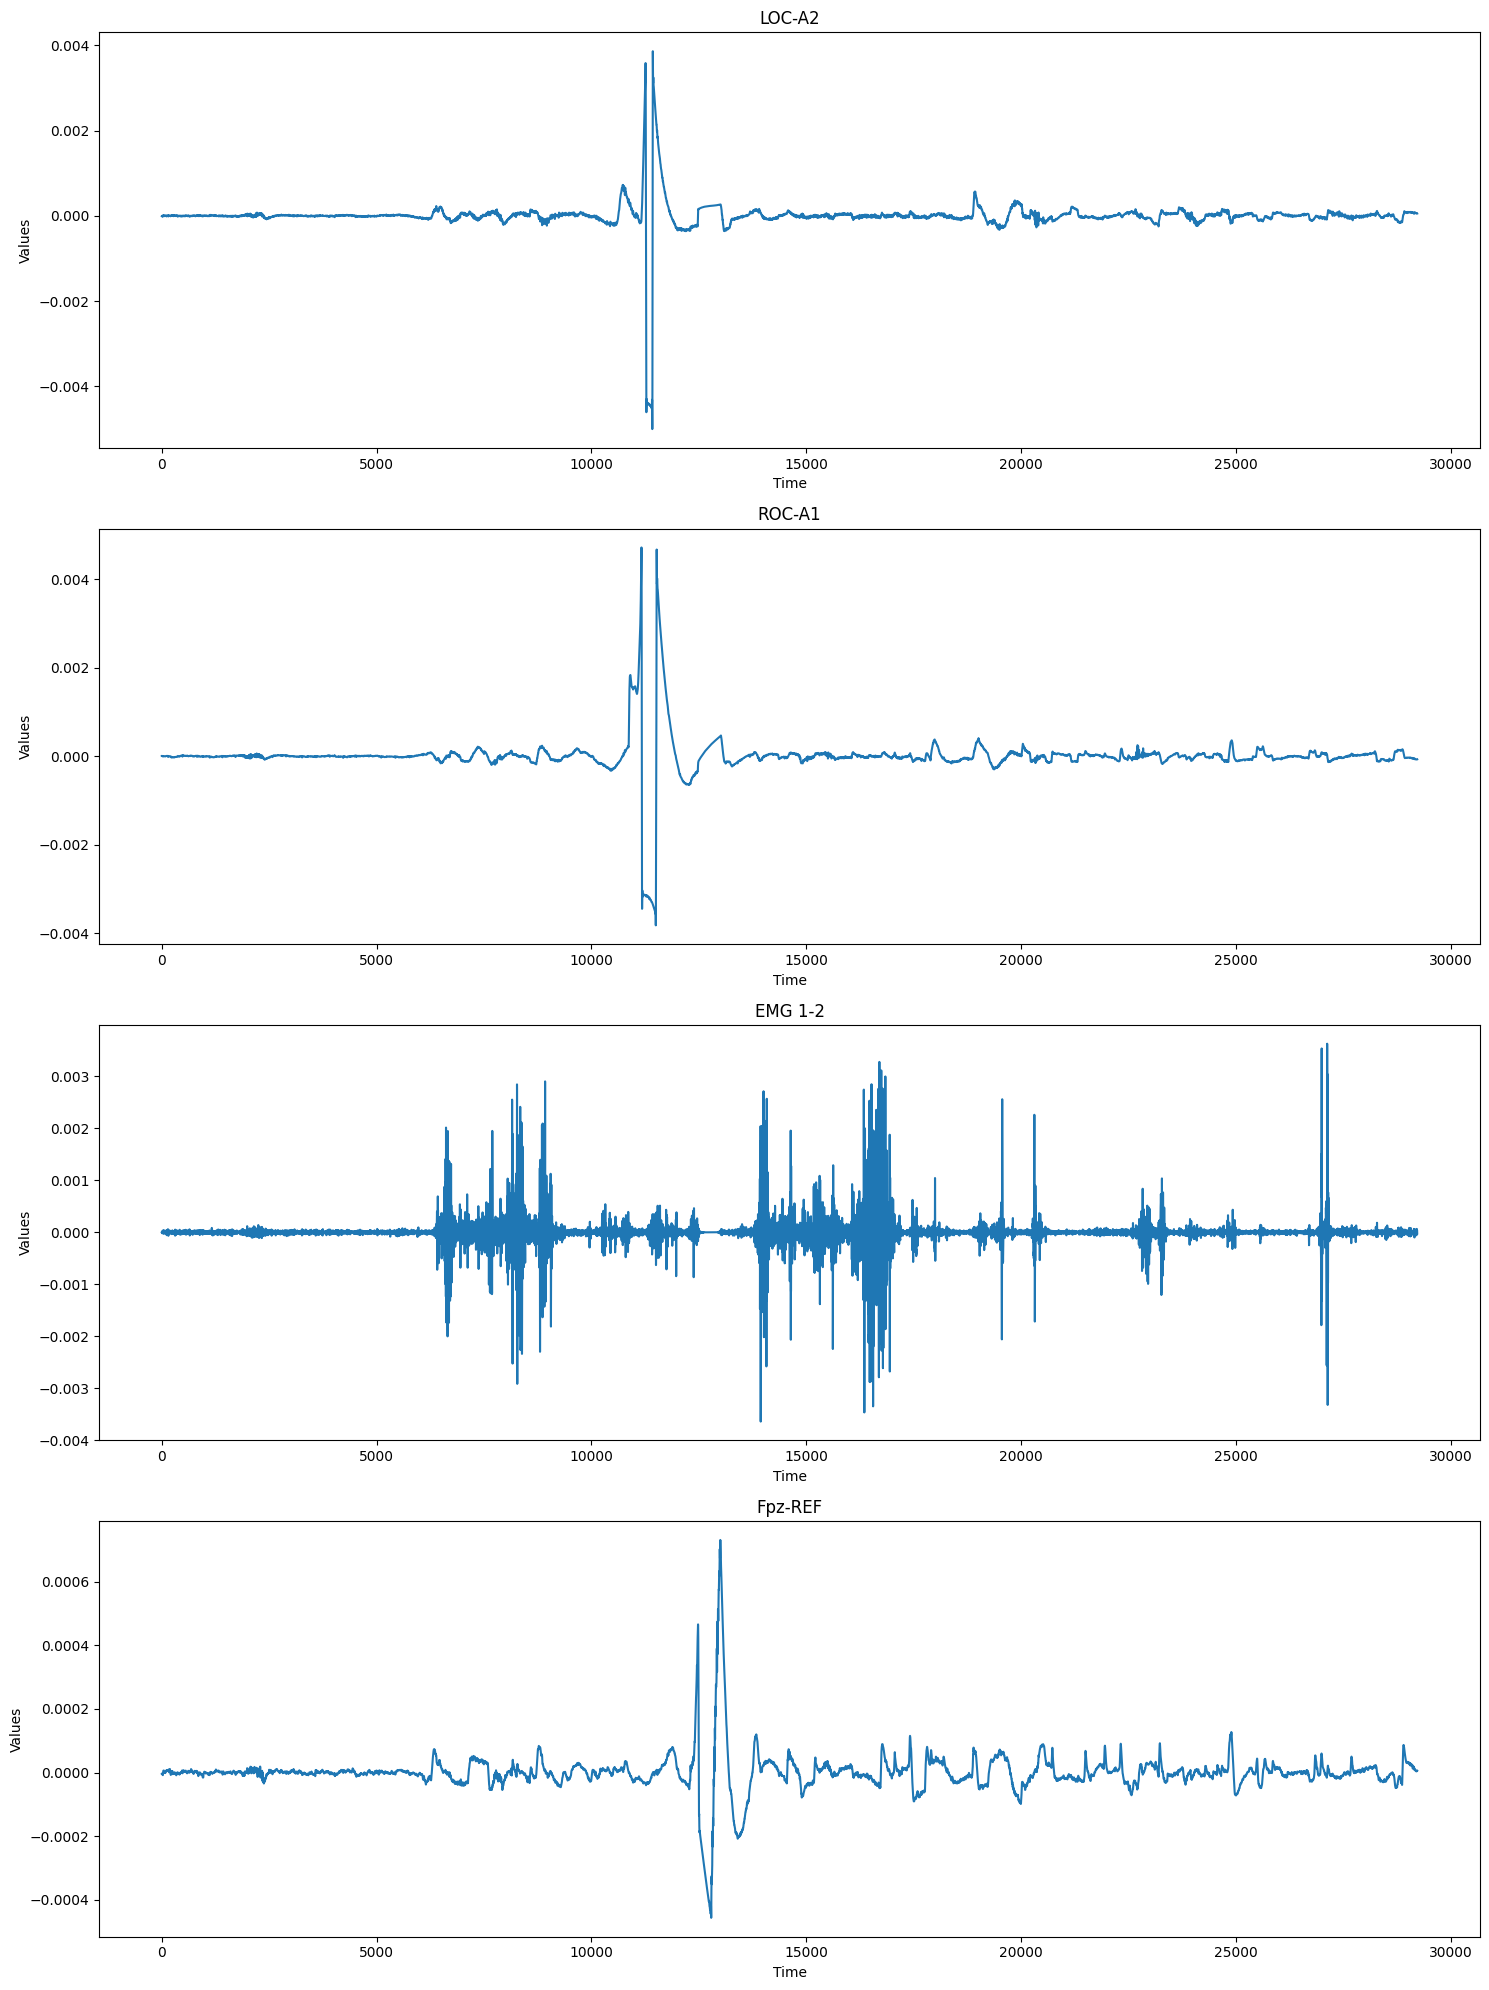

In [25]:
# Raw data
nrows = len(t_channels)
fig, axes = plt.subplots(nrows, ncols=1, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(raw_df.iloc[i, :])
    ax.set_title(raw_df.index[i])
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()